In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

path = 'C:/Users/ThinkPad/Desktop/path'

In [12]:
img = cv2.imread('C:/work/defects_pic/figs_bzt/147.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gs = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
kernel1 = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
kernel2 = np.transpose([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
t1 = cv2.filter2D(img_gs, -1, kernel1)
t2 = cv2.filter2D(img_gs, -1, kernel2)

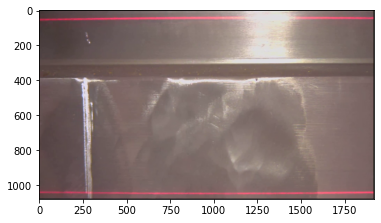

In [13]:
plt.imshow(img)

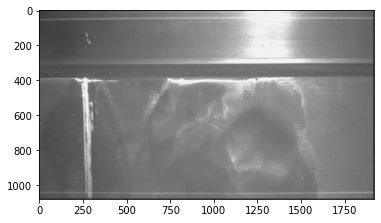

In [14]:
plt.imshow(img_gs, cmap='gray')

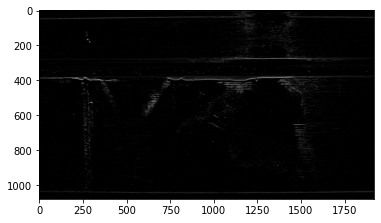

In [15]:
plt.imshow(t1, cmap='gray')


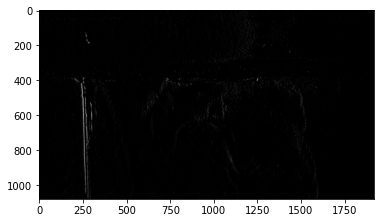

In [16]:
plt.imshow(t2, cmap='gray')

In [98]:
img = cv2.imread('C:/work/defects_pic/figs_bzt/147.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gs = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

True

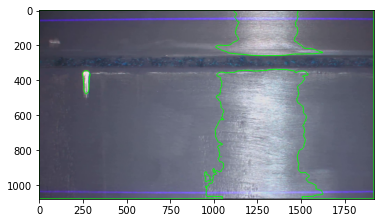

In [92]:
img = cv2.imread('C:/work/defects_pic/figs_bzt/508.png')
# img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gs = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
bimg_gs = cv2.blur(img_gs, (30, 30))
ret, threshed = cv2.threshold(bimg_gs, 150, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
contours, hierarchy = cv2.findContours(threshed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts, hiers = cv2.findContours(threshed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2:]
test = cv2.drawContours(img, contours, -1, (0, 255, 0), 3)
plt.imshow(test)
cv2.imwrite(os.path.join(path, '1.jpg'), bimg_gs)

In [139]:
img = cv2.imread('C:/work/defects_pic/figs_bzt/508.png')
# img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gs = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY).astype(np.int16)
bimg_gs = cv2.blur(img_gs, (30, 30))
line = bimg_gs[408, 220:320]
# np.diff(line[60:75])
line[60:75]
np.sum(np.diff(line[60:75]))
# np.diff(line)

-64

In [6]:
def window(vec, n):
    x = []
    for i in range(0, len(vec), n):
        x.append(np.sum(vec[i:i + n - 1]))
    return x

In [150]:
window(np.diff(line), 20)

0
20
40
60
80


[6, 64, 13, -78, 2]

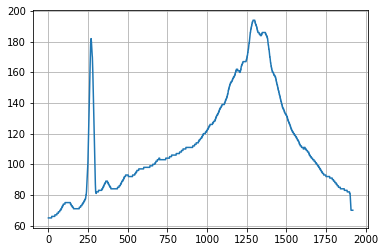

In [157]:
line2 = bimg_gs[408,].astype(np.int16)
plt.grid(True)
plt.plot(line2)

[4, 1, 4, 5, 3, 3, 8, 5, 5, 1, 4, 2, 1]

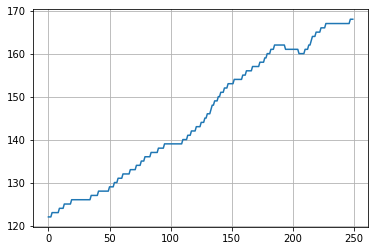

In [160]:
plt.grid(True)
plt.plot(line2[1000:1250])
window(np.diff(line2[1000:1250]), 20)

In [184]:
diff = np.diff(line2)
w = window(np.diff(line2), 20)
y = []
for num, i in enumerate(w):
    if i > 10 or i < -10:
        y.append(num * 20)
print(y)

[240, 260, 280, 1260, 1380, 1900]


In [4]:
img = cv2.imread('C:/work/defects_pic/figs_bzt/508.png')

In [7]:
def defects(pic2):
    img_gs = cv2.cvtColor(pic2, cv2.COLOR_RGB2GRAY).astype(np.int16)
    bimg_gs = cv2.blur(img_gs, (10, 10))
    for i in range(1080):
        ypic = bimg_gs[i,:]
        zx = []
        zz= []
        w = window(np.diff(ypic), 20)
        for num, j in enumerate(w):
            if j > 80 or j < -80:
                zx.append(num * 20)
            if j>20 and j<30 or j<-20 and j>-30:
                zz.append(num*20)
        for red in zx:
            pic2[i,red:red+2,:]=[0,255,0]
        for red in zz:
            pic2[i,red:red+2,:]=[255,0,0]
    cv2.imwrite(os.path.join(path , '1.jpg'), pic2)

defects(img)


